# Лабораторная работа 7. Понижение размерности. Отбор признаков. Извлечение признаков

# Задание
  1. Используйте **наборы данных для классификации и регрессии**, с помощью которых вы выполняли ЛР1-ЛР4.
2. С помощью классов библиотеки sklearn выполните понижение размерности (**размерность выберите сами, можно разные**) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. **Выберите две модели** (одна - для регрессии и другая - для классификации).
4. Обучите выбранные модели с использованием данных в пространстве низкой размерности - **используйте результаты выполнения пункта 3** (не забудьте, что понижать нужно и X_train и X_test - проще всего понижать X). **Сделайте вывод** о том, какие методы понижения размерности лучше всего подходят для ваших данных.
5. **Самостоятельно реализуйте алгоритм PCA**. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). **Выполните визуализацию данных** (точки на плоскости).
6. Попробуйте выполнить **кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans** из ЛР6.
7. Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. **Важно: модель должна быть реализована вами, не sklearn!** Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.


In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc, r2_score, mean_absolute_percentage_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.datasets import make_classification, make_regression

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.ensemble as ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt


**Загрузим предобработанные в прошлых лр датасеты**

In [2]:
data_reg = pd.read_csv('../data/mumbai.csv')
data_сlr = pd.read_csv('..\data\smoke_detector.csv')

In [3]:
data_сlr

,Unnamed: 0,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,50065,23.41,69.47,43.0,1120.0,13105.0,19890.0,931.239,14299.14,45432.26,21592.18,51914.680,30026.438,1.0
1,50064,23.00,70.28,50.0,1137.0,13094.0,19887.0,931.242,14333.69,45018.38,22959.95,51413.852,29590.688,1.0
2,50066,23.66,68.41,52.0,1141.0,13100.0,19882.0,931.251,14149.05,44786.43,21789.97,51167.711,29547.281,1.0
3,50124,25.86,62.03,546.0,1777.0,12872.0,19414.0,931.213,14318.17,44357.90,24472.12,50626.562,28964.852,1.0
4,50123,25.74,62.93,542.0,1710.0,12878.0,19426.0,931.215,14205.93,43765.07,24896.17,49936.551,28499.859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,25001,13.00,53.20,0.0,400.0,12439.0,19114.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62626,25002,13.06,52.81,0.0,400.0,12448.0,19155.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62627,25142,11.81,50.49,31.0,445.0,12545.0,19632.0,939.810,0.00,0.00,0.00,0.001,0.000,0.0
62628,25143,11.69,51.08,28.0,453.0,12548.0,19631.0,939.818,0.00,0.00,0.00,0.001,0.000,0.0


In [4]:
data_reg

,Unnamed: 0,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
0,0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0
4,4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6234,6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6235,6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6236,6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


## Предобработка данных таблицы для регрессии

In [5]:
# 1. Выполним анализ столбцов таблицы для регрессии.
# 1.1 Посмотрим список всех столбцов таблицы. Удалим из таблицы поля,
#содержащие уникальные значения (похожие на id) и малоинформативные

data_reg.drop(columns =['Unnamed: 0'], axis=1, inplace=True)
data_reg

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6234,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6235,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6236,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


In [6]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              6238 non-null   float64
 1   area                               6238 non-null   float64
 2   latitude                           6238 non-null   float64
 3   longitude                          6238 non-null   float64
 4   bedrooms                           6238 non-null   float64
 5   bathrooms                          6238 non-null   float64
 6   balcony                            6238 non-null   float64
 7   status                             6238 non-null   float64
 8   neworold                           6238 non-null   float64
 9   parking                            6238 non-null   float64
 10  furnished_status                   6238 non-null   float64
 11  lift                               6238 non-null   float

### Выделение целевого признака и предикторов

In [7]:
y_reg = data_reg["price"]  #целевой признак
X_reg = data_reg.drop(["price"], axis=1) #предикторы

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def test2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingRegressor().fit(X_train, y_train)
    print(mean_absolute_error(y_test, bag.predict(X_test)))
    print(r2_score(y_test, bag.predict(X_test)))

In [9]:
np.random.seed(42)

In [10]:
test2(X_reg, y_reg);

8107179.691951566
0.7457913784841461


In [11]:
X_reg.describe()

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,1185.556749,19.156725,72.868645,2.452228,2.425457,0.822219,0.999519,0.118307,0.822219,0.941648,0.822219,0.068291
std,637.472627,0.109515,0.058678,0.750102,0.763194,1.291916,0.021926,0.322997,1.291916,0.617831,1.291916,0.252265
min,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,846.000000,19.081509,72.832930,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1000.000000,19.147240,72.858017,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,1.000000,1.000000,8.000000,2.000000,8.000000,1.000000


## Понижение размерности для регрессии

### VarianceThreshold

In [12]:
from sklearn.feature_selection import VarianceThreshold
# будут отобраны только те признаки, у которых дисперсия выше
vt_rg = VarianceThreshold(2)
X_vt_rg = vt_rg.fit_transform(X_reg)
X_vt_rg.shape

(6238, 1)

In [13]:
X_vt_rg = pd.DataFrame(X_vt_rg, columns=vt_rg.get_feature_names_out())
X_vt_rg.head()

,area
0,629.0
1,974.0
2,968.0
3,629.0
4,1090.0


In [14]:
test2(X_vt_rg, y_reg)

13471935.351531623
0.33096361892426396


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)
X_scaled = pd.DataFrame(X_scaled, columns=X_reg.columns)
X_scaled.head()

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
0,-0.873138,-1.131673,0.472316,-0.602938,-0.557513,-0.636485,-45.588741,2.72994,-0.636485,0.094454,-0.636485,-0.270733
1,-0.331895,-1.131673,0.472316,0.730322,-0.557513,-0.636485,-45.588741,2.72994,-0.636485,0.094454,-0.636485,-0.270733
2,-0.341308,-0.649506,0.692523,0.730322,0.752874,-0.636485,-45.588741,2.72994,-0.636485,0.094454,-0.636485,-0.270733
3,-0.873138,-0.008850,-0.371257,-0.602938,-0.557513,0.911728,0.021935,2.72994,0.911728,0.094454,0.911728,-0.270733
4,-0.149911,0.190216,-0.319700,-0.602938,-0.557513,-0.636485,0.021935,2.72994,-0.636485,-1.524240,-0.636485,-0.270733


In [16]:
vt_rg = VarianceThreshold(1)
X_vt_rg = vt_rg.fit_transform(X_scaled)
print(X_vt_rg.shape)
test2(X_vt_rg, y_reg)

(6238, 3)
10837637.658851404
0.5163079024301348


### SelectKBest

In [17]:
skb_rg = SelectKBest(k=6)
X_skb_rg = skb_rg.fit_transform(X_reg, y_reg)
test2(X_skb_rg, y_reg)

7893017.2842204105
0.7827947768234921


In [18]:
X_skb_rg = pd.DataFrame(X_skb_rg, columns=skb_rg.get_feature_names_out())
X_skb_rg

,area,latitude,longitude,bedrooms,bathrooms,status
0,629.0,19.032800,72.896357,2.0,2.0,0.0
1,974.0,19.032800,72.896357,3.0,2.0,0.0
2,968.0,19.085600,72.909277,3.0,3.0,0.0
3,629.0,19.155756,72.846862,2.0,2.0,1.0
4,1090.0,19.177555,72.849887,2.0,2.0,1.0
...,...,...,...,...,...,...
6233,810.0,19.138320,72.810020,2.0,2.0,1.0
6234,1400.0,19.221920,72.854250,3.0,3.0,1.0
6235,750.0,19.144320,72.824111,2.0,2.0,1.0
6236,700.0,19.047201,72.872225,2.0,2.0,1.0


### RFE

In [19]:
tree = DecisionTreeRegressor().fit(X_reg, y_reg)

In [20]:
rfe_rg = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_reg, y_reg)
X_rfe_rg = pd.DataFrame(rfe_rg.transform(X_reg), columns=rfe_rg.get_feature_names_out())
X_rfe_rg

,area,latitude,longitude,bathrooms
0,629.0,19.032800,72.896357,2.0
1,974.0,19.032800,72.896357,2.0
2,968.0,19.085600,72.909277,3.0
3,629.0,19.155756,72.846862,2.0
4,1090.0,19.177555,72.849887,2.0
...,...,...,...,...
6233,810.0,19.138320,72.810020,2.0
6234,1400.0,19.221920,72.854250,3.0
6235,750.0,19.144320,72.824111,2.0
6236,700.0,19.047201,72.872225,2.0


In [21]:
test2(X_rfe_rg, y_reg)

7871515.610585402
0.7750406219455577


### PCA

In [22]:
pca_rg = PCA(n_components=2)
X_pca_rg = pca_rg.fit_transform(X_reg, y_reg)
X_pca_rg.shape

(6238, 2)

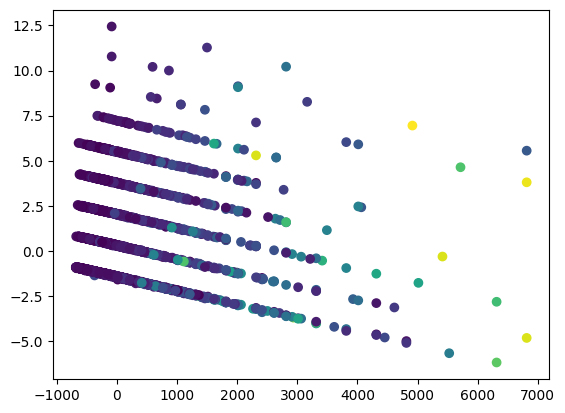

In [23]:
plt.scatter(X_pca_rg[:,0], X_pca_rg[:,1], c=y_reg);

In [24]:
sum(pca_rg.explained_variance_ratio_)

0.9999972214093122

In [25]:
test2(X_pca_rg, y_reg)

13077254.382885633
0.40218526327161586


## Предобработка для классификации 

In [26]:
data_сlr.drop(columns =['Unnamed: 0'], axis=1, inplace=True)
data_сlr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,23.41,69.47,43.0,1120.0,13105.0,19890.0,931.239,14299.14,45432.26,21592.18,51914.680,30026.438,1.0
1,23.00,70.28,50.0,1137.0,13094.0,19887.0,931.242,14333.69,45018.38,22959.95,51413.852,29590.688,1.0
2,23.66,68.41,52.0,1141.0,13100.0,19882.0,931.251,14149.05,44786.43,21789.97,51167.711,29547.281,1.0
3,25.86,62.03,546.0,1777.0,12872.0,19414.0,931.213,14318.17,44357.90,24472.12,50626.562,28964.852,1.0
4,25.74,62.93,542.0,1710.0,12878.0,19426.0,931.215,14205.93,43765.07,24896.17,49936.551,28499.859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,13.00,53.20,0.0,400.0,12439.0,19114.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62626,13.06,52.81,0.0,400.0,12448.0,19155.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62627,11.81,50.49,31.0,445.0,12545.0,19632.0,939.810,0.00,0.00,0.00,0.001,0.000,0.0
62628,11.69,51.08,28.0,453.0,12548.0,19631.0,939.818,0.00,0.00,0.00,0.001,0.000,0.0


### Выделение целевого признака и предикторов

In [27]:
y_clr = data_сlr["Fire Alarm"]  #целевой признак
X_clr = data_сlr.drop(["Fire Alarm"], axis=1) #предикторы

### Предобработка данных таблицы для классификации

### Балансировка для задачи классификации

In [28]:
#!pip install imbalanced-learn
# 1 - мажоритарный класс (доля примеров слишком высокая)
# 0 - миноритарный класс (доля примеров слишком низкая)
from imblearn.under_sampling import RandomUnderSampler #случайное удаление
#вычисляем количество экземпляров мажоритарного класса, которые нужно удалить
print(f"Количество объектов каждого класса до under_sampling: \n{y_clr.value_counts()}")
underSampler = RandomUnderSampler(sampling_strategy='majority') # пересэмплировать только мажоритарный класс
# удалим некоторое число примеров мажоритарного (большего) класса
X_under_sample, y_under_sample = underSampler.fit_resample(X_clr, y_clr)# повторить выборку 
print(f"Количество объектов каждого класса после under_sampling: \n{y_under_sample.value_counts()}")

Количество объектов каждого класса до under_sampling: 
Fire Alarm
1.0    44757
0.0    17873
Name: count, dtype: int64
Количество объектов каждого класса после under_sampling: 
Fire Alarm
0.0    17873
1.0    17873
Name: count, dtype: int64


In [29]:
#Тестировать модель будем с помощью ансамбля
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [30]:
def test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingClassifier().fit(X_train, y_train)
    print(classification_report(y_test, bag.predict(X_test)))

In [31]:
np.random.seed(42)

In [32]:
test(X_clr, y_clr)

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      4046
         1.0       1.00      0.83      0.91      5349

    accuracy                           0.90      9395
   macro avg       0.91      0.91      0.90      9395
weighted avg       0.92      0.90      0.90      9395



## Понижение размерности для классификации

### 1. Отбираем признаки с высокой дисперсией

Самый очевидный способ отбора признаков - брать признаки с высокой дисперсией. Такой подход предполагает, что мы работаем только с предикторами (игнорируем целевой признак)

In [33]:
X_clr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.981944,48.543291,1934.574293,669.170924,12942.351253,19754.257912,938.627725,100.594309,183.519427,491.463608,202.572138,80.049042
std,14.345858,8.852056,7781.388564,1904.813775,272.290962,609.513156,1.330888,922.524245,1971.624384,4265.661251,2210.296279,1083.383189
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.074000,47.540000,132.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.350000,8.820000,1.392000,0.033000
50%,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000
75%,25.400000,53.240000,1187.000000,437.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.247000,0.051000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000


In [34]:
from sklearn.feature_selection import VarianceThreshold

In [35]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(4)
X_vt = vt.fit_transform(X_clr)
X_vt.shape

(62630, 11)

In [36]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,23.41,69.47,43.0,1120.0,13105.0,19890.0,14299.14,45432.26,21592.18,51914.680,30026.438
1,23.00,70.28,50.0,1137.0,13094.0,19887.0,14333.69,45018.38,22959.95,51413.852,29590.688
2,23.66,68.41,52.0,1141.0,13100.0,19882.0,14149.05,44786.43,21789.97,51167.711,29547.281
3,25.86,62.03,546.0,1777.0,12872.0,19414.0,14318.17,44357.90,24472.12,50626.562,28964.852
4,25.74,62.93,542.0,1710.0,12878.0,19426.0,14205.93,43765.07,24896.17,49936.551,28499.859


In [37]:
test(X_vt, y_clr)

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      4046
         1.0       1.00      0.77      0.87      5349

    accuracy                           0.87      9395
   macro avg       0.88      0.89      0.87      9395
weighted avg       0.90      0.87      0.87      9395



In [38]:
#нормализация

mms = MinMaxScaler() #инициализируем модель
#нормализируем нашу выборку
#для каждого значения вычтем его минимум и поделим на разницу максимума и минимума
X_norms = mms.fit_transform(X_clr) #transform возвращает вложенные вычисления в каждой группе
X_norms = pd.DataFrame(mms.transform(X_norms), columns=X_clr.columns)
X_norms

C:\Users\verab\Desktop\не долги\4 семестр\ML\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.275376,-0.152480,1.194444e-08,-0.006711,-3.402623,-2.513745,-103.319907,0.000070,0.000022,0.000006,1.926237e-05,0.000033
1,0.275315,-0.152286,1.388889e-08,-0.006711,-3.402624,-2.513745,-103.319870,0.000070,0.000022,0.000006,1.907655e-05,0.000033
2,0.275413,-0.152736,1.444444e-08,-0.006711,-3.402623,-2.513745,-103.319759,0.000069,0.000022,0.000006,1.898522e-05,0.000033
3,0.275741,-0.154271,1.516667e-07,-0.006711,-3.402647,-2.513758,-103.320227,0.000070,0.000021,0.000006,1.878443e-05,0.000032
4,0.275723,-0.154054,1.505556e-07,-0.006711,-3.402646,-2.513758,-103.320203,0.000069,0.000021,0.000007,1.852841e-05,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.273826,-0.156396,0.000000e+00,-0.006711,-3.402691,-2.513766,-103.214944,0.000000,0.000000,0.000000,0.000000e+00,0.000000
62626,0.273834,-0.156490,0.000000e+00,-0.006711,-3.402690,-2.513765,-103.214944,0.000000,0.000000,0.000000,0.000000e+00,0.000000
62627,0.273648,-0.157048,8.611111e-09,-0.006711,-3.402680,-2.513752,-103.214304,0.000000,0.000000,0.000000,3.710391e-13,0.000000
62628,0.273630,-0.156906,7.777778e-09,-0.006711,-3.402680,-2.513752,-103.214205,0.000000,0.000000,0.000000,3.710391e-13,0.000000


In [39]:
vt = VarianceThreshold(0.0000001)
X_vt = vt.fit_transform(X_norms)
print(X_vt.shape)
test(X_vt, y_clr)

(62630, 3)
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      4046
         1.0       0.99      0.95      0.97      5349

    accuracy                           0.97      9395
   macro avg       0.97      0.97      0.97      9395
weighted avg       0.97      0.97      0.97      9395



### 2. Одномерный отбор признаков

Одномерный отбор признаков предполагает, что для каждого признака оценивается степень его влияния на целевую переменную. Признаки с небольшим влиянием удаляются. В качестве оценки обычно используются статистические тесты.

In [40]:
from sklearn.feature_selection import SelectKBest

In [41]:
skb = SelectKBest(k=5)
X_skb = skb.fit_transform(X_clr, y_clr)
test(X_skb, y_clr)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4046
         1.0       1.00      0.93      0.96      5349

    accuracy                           0.96      9395
   macro avg       0.95      0.96      0.96      9395
weighted avg       0.96      0.96      0.96      9395



In [42]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa]
0,23.41,69.47,43.0,19890.0,931.239
1,23.00,70.28,50.0,19887.0,931.242
2,23.66,68.41,52.0,19882.0,931.251
3,25.86,62.03,546.0,19414.0,931.213
4,25.74,62.93,542.0,19426.0,931.215
...,...,...,...,...,...
62625,13.00,53.20,0.0,19114.0,939.758
62626,13.06,52.81,0.0,19155.0,939.758
62627,11.81,50.49,31.0,19632.0,939.810
62628,11.69,51.08,28.0,19631.0,939.818


### 3. Рекурсивный отбор признаков

Рекурсивный отбор признаков предполагает обучение множества моделей. Сначала модель обучается на всех признаках, а затем мы начинаем исключать из модели признаки с низкой значимостью. Делаем это до тех пор, пока не останется столько признаков, сколько нам нужно получить

Важный момент состоит в том, каким образом мы исключаем признаки. Происходит это на основе значения значимости признака. Обученные регрессионные модели и деревья решений хранят информацию о значимости признаков (коэффициенты в линейных моделях и значения значимости признаков у деревьев). Можно отсортировать признаки по этим значениям и производить отбор

In [43]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier().fit(X_clr, y_clr)

In [45]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_clr, y_clr)
X_rfe = pd.DataFrame(rfe.transform(X_clr), columns=rfe.get_feature_names_out())
X_rfe

,TVOC[ppb],Raw Ethanol,Pressure[hPa],NC0.5
0,43.0,19890.0,931.239,21592.18
1,50.0,19887.0,931.242,22959.95
2,52.0,19882.0,931.251,21789.97
3,546.0,19414.0,931.213,24472.12
4,542.0,19426.0,931.215,24896.17
...,...,...,...,...
62625,0.0,19114.0,939.758,0.00
62626,0.0,19155.0,939.758,0.00
62627,31.0,19632.0,939.810,0.00
62628,28.0,19631.0,939.818,0.00


In [46]:
test(X_rfe, y_clr)

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78      4046
         1.0       1.00      0.56      0.72      5349

    accuracy                           0.75      9395
   macro avg       0.82      0.78      0.75      9395
weighted avg       0.84      0.75      0.74      9395



### 4. Отбор признаков по их значимости

Во многих случаях можно не использовать рекурсивный отбор, а просто взять обученное дерево и сразу же взять нужное количество признаков с самой высокой значимостью

In [47]:
import matplotlib.pyplot as plt

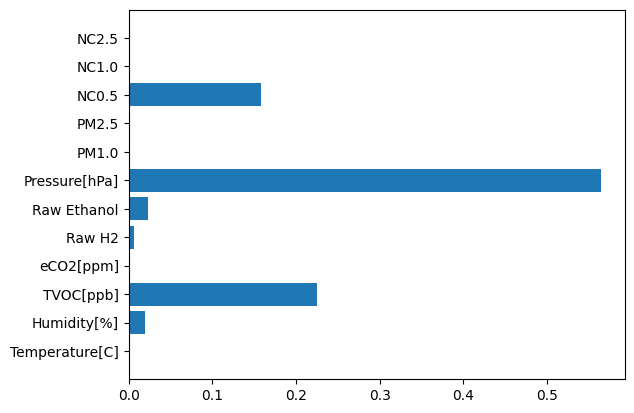

In [48]:
plt.barh(width=tree.feature_importances_, y=X_clr.columns);

## Выделение признаков

В отличие от отбора признаков, когда мы исключаем из датасета ненужные признаки, при выделении **мы производим преобразование данных из пространства высокой размерности в пространство низкой размерности**. Важно понимать, что при таком подходе по сути мы вводим "новые оси". Это означает, что признаки в целевом пространстве мы уже не сможем интерпретировать

### 1. Метод главных компонент

Чтобы выполнить понижение размерности методом PCA необходимо последовательно выполнить следующие действия.

1. Стандартизация данных (итерируемся по столбцам, от каждого элемента столбца отнимаем среднее по столбцу и делим на отклонение столбца - то, что делает StandartScaller).
2. Вычисление ковариационной матрицы.
3. Вычисление собственных векторов и собственных значений ковариационной матрицы.
4. Сортировка пар <собственное значение, собственный вектор> по убыванию.
5. Выбор первых k пар <собственное значение, собственный вектор>, где k - размерность целевого пространства.
6. Матрица, составленная из k собственных векторов - матрица преобразования из данного пространства в пространство с размерностью k.
7. Чтобы произвести понижение размерности необходимо умножить матрицу стандартизированных входных данных (результат пункта 1) на матрицу из k собственных векторов (результат пункта 6).

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clr, y_clr)
X_pca.shape

(62630, 2)

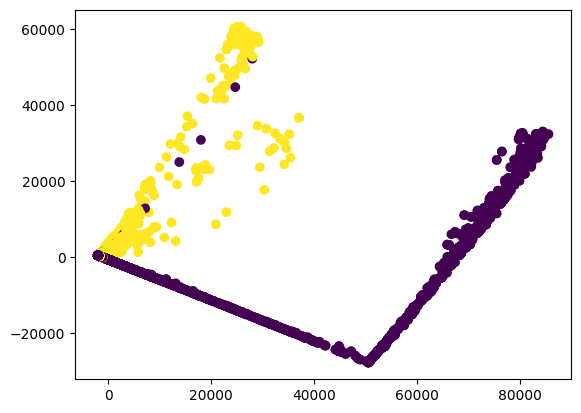

In [51]:
#визуализируем данные
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_clr);

In [52]:
#оценим, сколько информации потеряли
sum(pca.explained_variance_ratio_)

0.9516286162519574

Видно, что мы сохранили более 95% информации понизив размерность до 2 - попробуем выполнить классификацию

In [53]:
test(X_pca, y_clr)

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      4046
         1.0       0.91      0.80      0.85      5349

    accuracy                           0.84      9395
   macro avg       0.84      0.85      0.84      9395
weighted avg       0.85      0.84      0.84      9395



In [54]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X_clr, y_clr)

In [55]:
test(X_pca_2, y_clr)

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.84      4046
         1.0       0.99      0.71      0.83      5349

    accuracy                           0.83      9395
   macro avg       0.86      0.85      0.83      9395
weighted avg       0.88      0.83      0.83      9395



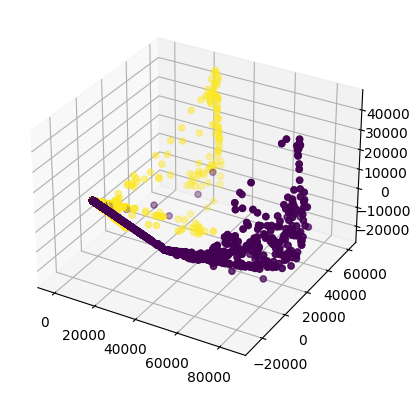

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y_clr);

### 2. Нелинейные методы выделения признаков

In [57]:
from sklearn.manifold import TSNE, Isomap

In [58]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_norms)

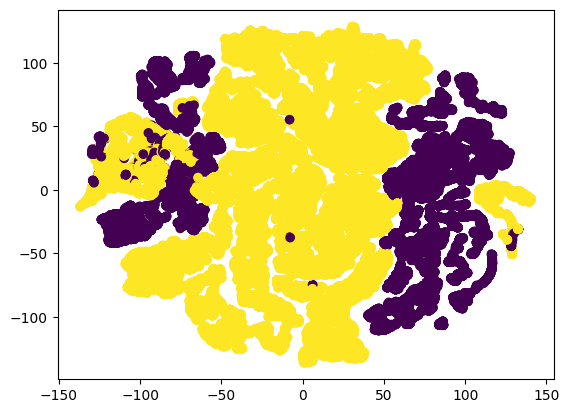

In [59]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_clr);

In [60]:
test(X_tsne, y_clr)

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      4046
         1.0       0.96      0.92      0.94      5349

    accuracy                           0.93      9395
   macro avg       0.93      0.93      0.93      9395
weighted avg       0.93      0.93      0.93      9395



In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\verab\Desktop\не долги\4 семестр\ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


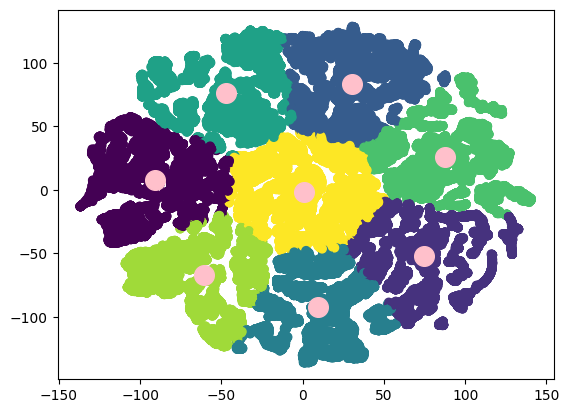

In [64]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='pink', s=200);

# Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности

## Для классификации - наивный *Байес*

1

In [66]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_vt, y_clr, test_size=0.2)

In [67]:
gnb = GaussianNB().fit(X_train_cl, y_train_cl)
gnb_predict = gnb.predict(X_test_cl)

In [68]:
print(metrics.classification_report(y_test_cl, gnb_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.32      0.46      3555
         1.0       0.78      0.97      0.87      8971

    accuracy                           0.79     12526
   macro avg       0.80      0.65      0.66     12526
weighted avg       0.79      0.79      0.75     12526



2

In [72]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_skb, y_clr, test_size=0.2)

In [73]:
gnb = GaussianNB().fit(X_train_cl, y_train_cl)
gnb_predict = gnb.predict(X_test_cl)

In [74]:
print(metrics.classification_report(y_test_cl, gnb_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.57      0.70      3593
         1.0       0.85      0.98      0.91      8933

    accuracy                           0.86     12526
   macro avg       0.88      0.77      0.80     12526
weighted avg       0.86      0.86      0.85     12526



3

In [76]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_rfe, y_clr, test_size=0.2)

In [77]:
gnb = GaussianNB().fit(X_train_cl, y_train_cl)
gnb_predict = gnb.predict(X_test_cl)

In [78]:
print(metrics.classification_report(y_test_cl, gnb_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.40      0.55      3587
         1.0       0.80      0.98      0.88      8939

    accuracy                           0.82     12526
   macro avg       0.86      0.69      0.72     12526
weighted avg       0.83      0.82      0.79     12526



4

In [80]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_pca, y_clr, test_size=0.2)

In [81]:
gnb = GaussianNB().fit(X_train_cl, y_train_cl)
gnb_predict = gnb.predict(X_test_cl)

In [82]:
print(metrics.classification_report(y_test_cl, gnb_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.12      0.22      3524
         1.0       0.74      1.00      0.85      9002

    accuracy                           0.75     12526
   macro avg       0.83      0.56      0.53     12526
weighted avg       0.79      0.75      0.67     12526



5

In [84]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_tsne, y_clr, test_size=0.2)

In [85]:
gbn = GaussianNB().fit(X_train_cl, y_train_cl)
gnb_predict = gnb.predict(X_test_cl)

In [86]:
print(metrics.classification_report(y_test_cl, gnb_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3644
         1.0       0.71      1.00      0.83      8882

    accuracy                           0.71     12526
   macro avg       0.35      0.50      0.41     12526
weighted avg       0.50      0.71      0.59     12526



C:\Users\verab\Desktop\не долги\4 семестр\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verab\Desktop\не долги\4 семестр\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\verab\Desktop\не долги\4 семестр\ML\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

# Самостоятельно реализуйте алгоритм PCA. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).

In [88]:
def PCA(X, y, k):

    X_mean = X - np.mean(X, axis = 0) # стандартизация данных, отнимает среднее 

    cov_mat = np.cov(X_mean, rowvar = False) # вычисление ковариационной матрицы
    
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat) # вычисление собсвенных значений и собсвенных векторов (они ортогональны, каждый вектор представляет главную ось)

    sorted_index = np.argsort(eigen_values)[::-1] # отсортируем собственные значения и векторы по убыванию
    sorted_eigen_values = eigen_values[sorted_index]
    sorted_eigen_vectors = eigen_vectors[:,sorted_index]

    eigen_vector_k_dimention = sorted_eigen_vectors[:,0:k] # выберем первые k компонентов

    X_reduced_dim = np.dot(eigen_vector_k_dimention.transpose() , X_mean.transpose()).transpose() # умножим матрицу стандартизированных входных данных (результат пункта 1) на матрицу из k собственных векторо    
    
    # Визуализация 
    plt.scatter(X_reduced_dim[:,0], X_reduced_dim[:,1], c=y);

    return X_reduced_dim

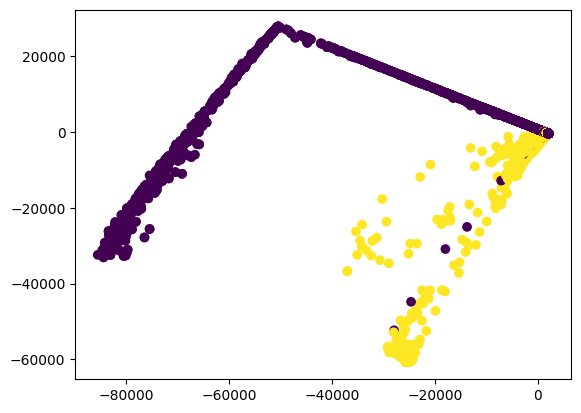

In [90]:
x_class = PCA(X_clr, y_clr, 2)

In [91]:
x_class

array([[-24458.82066466, -60289.66740759],
       [-24849.6431417 , -60696.46124582],
       [-24296.7554053 , -59745.41367232],
       ...,
       [  1946.15102482,   -379.14125734],
       [  1947.57069671,   -381.70272793],
       [  1921.76791802,   -379.97526639]])

In [93]:
y_clr.to_numpy()

array([1., 1., 1., ..., 0., 0., 0.])

# Попробуйте выполнить кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans из ЛР6.

In [94]:
class KMeans():
    def __init__(self, n_clusters=3, max_iters=1000):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.labels = None
        self.iters = 0
        self.inertia = None
        
    def fit(self, data):
        data_bounds = np.squeeze(np.sort(np.array([np.amax(data[0], axis=0), np.amin(data[0], axis=0)]).T))
        self.centroids = []
        self.labels = np.zeros(data[0].shape[0])
        
        for i in range(self.n_clusters):
            self.centroids.append([(data_bounds[i][1] - data_bounds[i][0]) * np.random.random_sample() + data_bounds[i][0] for i in range(data[0].shape[1])])
        
        self.centroids = np.array(self.centroids)
        change = np.inf # для разницы между пред центроидами и новыми (среднее)
        
        while (self.iters < self.max_iters and change > 0.5): # пока есть запланированное кол-во итераций или изменение центроидов значительно:
            prev_centroids = self.centroids.copy()
            dists = []
            min_dists = []
            
            for point in data[0]:
                dists_centroids = []
                for centroid in self.centroids:
                    dists_centroids.append(np.linalg.norm(point - centroid))
                dists.append(dists_centroids)
                
            for i in range(len(dists)):
                self.labels[i] = np.argmin(dists[i]) # вернем и присвоим самое небольшое значение 
                min_dists.append(dists[i][np.argmin(dists[i])]) # для вычисления метрики
            self.inertia = np.sum(np.square((min_dists))) # наша метрика
            
            for i in range(self.n_clusters): 
                cluster_points = []
                for j in range(len(self.labels)):
                    if self.labels[j] == i:
                        cluster_points.append(data[0][j]) # пересчитываем центроид, не используя евклидому метрику, а используя среднее для каждой 
                self.centroids[i] = np.mean(cluster_points, axis=0) # из координат среди всех тех точек, которые попали в кластер i
                


            change = np.mean(np.linalg.norm(self.centroids - prev_centroids))
            self.iters +=1

In [96]:
x_class_km = (x_class, y_clr.to_numpy())
x_class_km

(array([[-24458.82066466, -60289.66740759],
        [-24849.6431417 , -60696.46124582],
        [-24296.7554053 , -59745.41367232],
        ...,
        [  1946.15102482,   -379.14125734],
        [  1947.57069671,   -381.70272793],
        [  1921.76791802,   -379.97526639]]),
 array([1., 1., 1., ..., 0., 0., 0.]))

1365768497575.1377


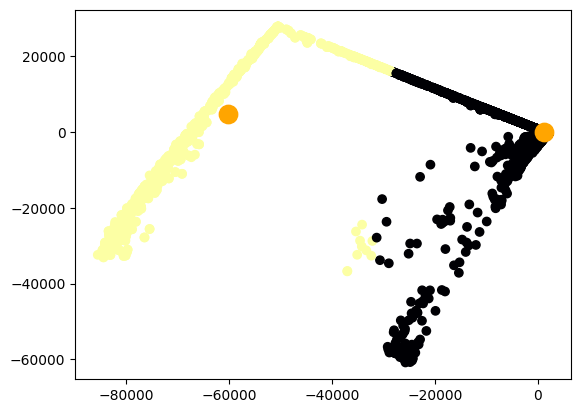

In [97]:
km = KMeans(n_clusters=2)
km.fit(x_class_km)
print(km.inertia)
plt.scatter(x_class_km[0][:,0], x_class_km[0][:,1], c=km.labels, cmap='inferno_r');
plt.scatter(km.centroids[:,0], km.centroids[:,1], s=175, c='orange');


# Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. Важно: модель должна быть реализована вами, не sklearn! Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.

In [105]:
class LinReg:
    def __init__(self, lr=0.001, iters=5000, eps=0.001):
        self.lr = lr
        self.iters = iters
        self.eps = eps
        
    
    def fit(self, x, y):
        dist = np.inf
        # X = self.transform(x)
        X = x.values
        self.X = X
        w = np.zeros(X.shape[1])
        iter = 0
        while dist > self.eps and iter <= self.iters:
            loss = self.fun_error(X, y, w)
            w = w - (self.lr * 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0]) # + лямбда * 2 \n - для поддержки регуляризации 
            dist = np.abs(loss - self.fun_error(X, y, w))
            iter += 1
        self.w = w  
    
    def transform(self, x):
        return np.concatenate(np.ones((len(x), 1)), axis=1)


    def fun_error(self, x, y, w):
        return sum((y - np.dot(x, w)) ** 2) / x.shape[0]
    
    def predict(self, x):
        return np.dot(x, self.w)
        

    def select_k_best(self, n):
        print(self.w)
        W = list(zip(range(len(self.w)), self.w))
        W = sorted(W, key=lambda x: x[1], reverse=True)
        W = W[: n]
        print(W)
        print()
        for i in range(len(W)):
            print(W[i])

    


In [107]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_reg, y_reg, test_size=0.2)

In [108]:
LR = LinReg()
LR.fit(X_train_rg, y_train_rg)
y_pred = LR.predict(X_train_rg)

In [109]:
LR.select_k_best(10)

[-3.67744487e+153 -4.67119363e+151 -1.77764042e+152 -6.65682987e+150
 -6.59506685e+150 -2.33849254e+150 -2.43892068e+150 -3.00791832e+149
 -2.33849254e+150 -2.32866231e+150 -2.33849254e+150 -1.64954469e+149]
[(11, -1.6495446936023408e+149), (7, -3.0079183160508152e+149), (9, -2.3286623135988323e+150), (5, -2.3384925372165225e+150), (8, -2.3384925372165225e+150), (10, -2.3384925372165225e+150), (6, -2.4389206828092323e+150), (4, -6.595066851689392e+150), (3, -6.656829867921727e+150), (1, -4.6711936286556644e+151)]

(11, -1.6495446936023408e+149)
(7, -3.0079183160508152e+149)
(9, -2.3286623135988323e+150)
(5, -2.3384925372165225e+150)
(8, -2.3384925372165225e+150)
(10, -2.3384925372165225e+150)
(6, -2.4389206828092323e+150)
(4, -6.595066851689392e+150)
(3, -6.656829867921727e+150)
(1, -4.6711936286556644e+151)
